In [177]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Import train & test data 
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [158]:
train.head()

,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0
1,1459,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN,0
2,7678,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0
3,34943,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN,0
4,17741,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0


In [179]:
from word2number import w2n
def getGender(x):
    return 1 if x.lower() == 'm' else (0 if x.lower() == 'f' else (2 if x.lower() == 'other' else ''))

def splitAgeGender(x, ret_age=True):
    if not x or str(x) == 'nan':
        return ''
    
    parts = str(x).replace(',', ' ').split()
    age = gender = ''
    if ret_age:
        try:
            age = w2n.word_to_num(parts[0])
        except ValueError:
            try:
                age = float(parts[0])
            except ValueError:
                pass
        if not age and len(parts) > 1:
            try:
                age = w2n.word_to_num(parts[1])
            except ValueError:
                try:
                    age = float(parts[1])
                except ValueError:
                    pass
        return age
    else:
        gender = getGender(parts[0])
        if gender == '' and len(parts) > 1:
            gender = getGender(parts[1])
        return gender
            
# Added - Job and location
def split_job_livivng(line, job = True):
    if not line or str(line) == 'nan':
        return 'AAA'
    
    part_1, part_2 = line.split('?')[:2:]
    if job:
        if 'gov' in part_1.lower() or 'gov' in part_2.lower():
            part_1 = 'GOVERNMENT'
        elif 'pri' in part_1.lower() or 'pri' in part_2.lower():
            part_1 = 'PRIVATE'
        elif 'bus' in part_1.lower() or 'bus' in part_2.lower() or 'biz' in part_1.lower() or 'biz' in part_2.lower():
            part_1 = 'BUSINESS'
        elif 'parent' in part_1.lower() or 'parent' in part_2.lower():
            part_1 = 'PARENTAL_LEAVE'
        elif 'unemp' in part_1.lower() or 'unemp' in part_2.lower():
            part_1 = 'UNEMPLOYED'
        else:
            part_1 = 'AAA'
        return part_1

    else:    
        if 'city' in part_1.lower() or 'city' in part_2.lower():
            part_2 = 'CITY'
        elif 'remo' in part_1.lower() or 'remo' in part_2.lower():
            part_2 = 'REMOTE'        
        elif part_1 == 'c' or part_2 == 'c':
            part_2 = 'CITY'
        elif part_1 == 'r' or part_2 == 'r':
            part_2 = 'REMOTE'
        else:
            part_2 = 'AAA'
        return part_2
        
        
old_df = test
new_df = pd.DataFrame(old_df)
new_df['sex'] = old_df['sex and age'].apply(lambda x: splitAgeGender(x, False))
new_df['age'] = old_df['sex and age'].apply(lambda x: splitAgeGender(x, True))


new_df['job'] = old_df['job_status and living_area'].apply(lambda x: split_job_livivng(x, True))
new_df['location'] = old_df['job_status and living_area'].apply(lambda x: split_job_livivng(x, False))

#new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job', 'location', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job', 'location', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD']]
print(len(new_df))

8718


In [140]:
print(new_df['age'].unique())
print(new_df['sex'].unique())
print(new_df['smoker_status'].unique())
print(new_df['job'].unique())
print(new_df['location'].unique())

[36 40 59 33 22 60 83 47 82 49 58 4.88 38 50 84 68 52 62 35 32 14 43 12 55
 30 56 78 69 48 64 16 63 26 29 61 79 20 5 42 72 73 21 34 27 41 31 18 85
 3.72 51 4.08 71 76 45 67 19 17 46 7 65 66 81 54 39 3.32 6 53 28 37 57 24
 8 80 4 13 44 4.72 25 3.88 74 77 4.64 15 9 4.24 23 70 11 3.56 75 4.32 3.48
 3.64 4.4 4.16 10 3.8 4.48 3.08 4.56 3.16 '' 4.8 3.24 3.4]
[0 1 2 '']
['active_smoker' 'non-smoker' nan 'quit' '?' 'N?a' '>']
['PRIVATE' 'GOVERNMENT' 'BUSINESS' 'PARENTAL_LEAVE' 'UNEMPLOYED' 'AAA']
['REMOTE' 'CITY' 'AAA']


In [181]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

job = new_df['job']
job_encoded = encoder.fit_transform(job)

print(new_df['job'].unique())
print(encoder.classes_)
print(job_encoded)

# let's add this array to dataframe...
new_df['job_encoded'] = job_encoded

# ################

location = new_df['location']
location_encoded = encoder.fit_transform(location)

print(new_df['location'].unique())
print(encoder.classes_)
print(location_encoded)

# let's add this array to dataframe...
new_df['location_encoded'] = job_encoded
print(len(new_df))

['PRIVATE' 'GOVERNMENT' 'BUSINESS' 'PARENTAL_LEAVE' 'UNEMPLOYED' 'AAA']
['AAA' 'BUSINESS' 'GOVERNMENT' 'PARENTAL_LEAVE' 'PRIVATE' 'UNEMPLOYED']
[4 2 1 ... 4 4 2]
['REMOTE' 'CITY' 'AAA']
['AAA' 'CITY' 'REMOTE']
[2 1 2 ... 1 2 2]
8718


In [103]:
new_df.to_csv('./Data/train_as.csv')

In [182]:
def getSmokeStatus(x):
    x = str(x).lower()
    x = ''.join([i for i in x if i.isalpha()])
    return 1 if 'non' in x else (2 if 'quit' in x else (3 if 'active' in x else 0))

new_df['smoker_status_2'] = old_df['smoker_status'].apply(getSmokeStatus)
#new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job', 'job_encoded', 'location', 'location_encoded', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job,location,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,job_encoded,location_encoded,smoker_status_2
0,33327,0,36,"F, 36",0.0,0.0,1.0,PRIVATE,REMOTE,private_sector?Remote,76.05,33.4,active_smoker,NaN,NaN,NaN,NaN,4,4,3
1,839,0,40,"F, 40",0.0,0.0,1.0,GOVERNMENT,CITY,City?government,73.77,30.1,non-smoker,NaN,NaN,NaN,NaN,2,2,1
2,11127,1,59,"M, 59",0.0,0.0,1.0,BUSINESS,REMOTE,business_owner?Remote,62.95,30.8,NaN,NaN,NaN,NaN,NaN,1,1,0
3,20768,0,33,"33, F",0.0,0.0,1.0,PRIVATE,CITY,private_sector?City,68.81,36.5,quit,NaN,NaN,NaN,NaN,4,4,2
4,37774,0,22,"F, 22",0.0,0.0,0.0,PRIVATE,CITY,private_sector?City,122.89,30.8,active_smoker,NaN,NaN,NaN,NaN,4,4,3


In [148]:
print(new_df['smoker_status_2'].unique())
print(new_df['job_encoded'].unique())
print(new_df['location_encoded'].unique())

[3 1 0 2]
[4 2 1 3 5 0]
[4 2 1 3 5 0]


In [106]:
new_df.to_csv('./Data/train_as_ss.csv')

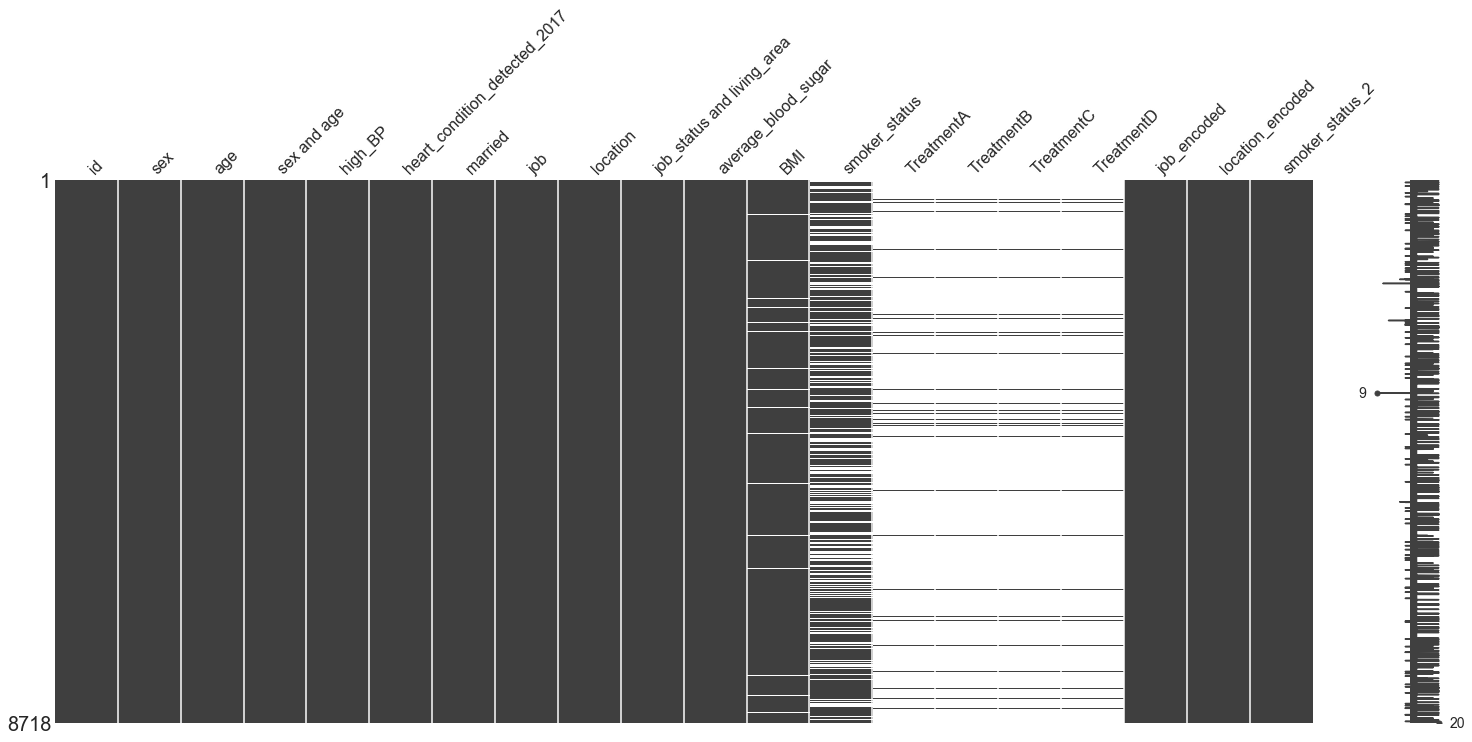

In [171]:
missingno.matrix(new_df)

In [145]:
all_is_null = zip(new_df.isnull(), new_df.isnull().sum())
for is_null in all_is_null:
    if is_null[1] > 0:
        print(f'{is_null[0]}: {is_null[1]}')
print()
print(f'Total: {len(train)}')

sex and age: 10
high_BP: 11
heart_condition_detected_2017: 5
married: 2
job_status and living_area: 10
average_blood_sugar: 11
BMI: 302
smoker_status: 2697
TreatmentA: 8302
TreatmentB: 8302
TreatmentC: 8302
TreatmentD: 8302

Total: 34872


In [183]:
def fixBmi(x):
    x = str(x)
    if x == 'nan' or x == '?' or x == '.':
        x = 0
        
    return float(x)

new_df['BMI'] = old_df['BMI'].apply(fixBmi)
print(len(new_df))

8718


In [110]:
#new_df.BMI.plot.hist()

In [184]:

def discreteBmi(x):
    if x < 0.5:
        return 0
    elif x < 18.5:
        return 1
    elif x < 25:
        return 2
    elif x < 30:
        return 3
    elif x < 35:
        return 4
    elif x < 40:
        return 5
    return 6

new_df['BMI_2'] = new_df['BMI'].apply(discreteBmi)
#new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job', 'job_encoded', 'location', 'location_encoded', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df.head()
print(len(new_df))

8718


In [185]:
#new_df_2 = new_df[new_df['stroke_in_2018'].isin(['1', '0'])]
#print(new_df_2['stroke_in_2018'].unique())
new_df_2 = new_df

In [186]:
def discreteBloodSugar(x):
    if x < 70:
        return 1
    elif x < 120:
        return 2
    elif x < 200:
        return 3
    elif x < 280:
        return 3
    return 4

new_df_2['average_blood_sugar_2'] = new_df_2['average_blood_sugar'].apply(discreteBloodSugar)
#new_df_2 = new_df_2[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job', 'job_encoded', 'location', 'location_encoded', 'job_status and living_area', 'average_blood_sugar', 'average_blood_sugar_2', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df_2.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job,location,job_status and living_area,...,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,job_encoded,location_encoded,smoker_status_2,BMI_2,average_blood_sugar_2
0,33327,0,36,"F, 36",0.0,0.0,1.0,PRIVATE,REMOTE,private_sector?Remote,...,active_smoker,NaN,NaN,NaN,NaN,4,4,3,4,2
1,839,0,40,"F, 40",0.0,0.0,1.0,GOVERNMENT,CITY,City?government,...,non-smoker,NaN,NaN,NaN,NaN,2,2,1,4,2
2,11127,1,59,"M, 59",0.0,0.0,1.0,BUSINESS,REMOTE,business_owner?Remote,...,NaN,NaN,NaN,NaN,NaN,1,1,0,4,1
3,20768,0,33,"33, F",0.0,0.0,1.0,PRIVATE,CITY,private_sector?City,...,quit,NaN,NaN,NaN,NaN,4,4,2,5,1
4,37774,0,22,"F, 22",0.0,0.0,0.0,PRIVATE,CITY,private_sector?City,...,active_smoker,NaN,NaN,NaN,NaN,4,4,3,4,3


0    34179
1      652
Name: stroke_in_2018, dtype: int64


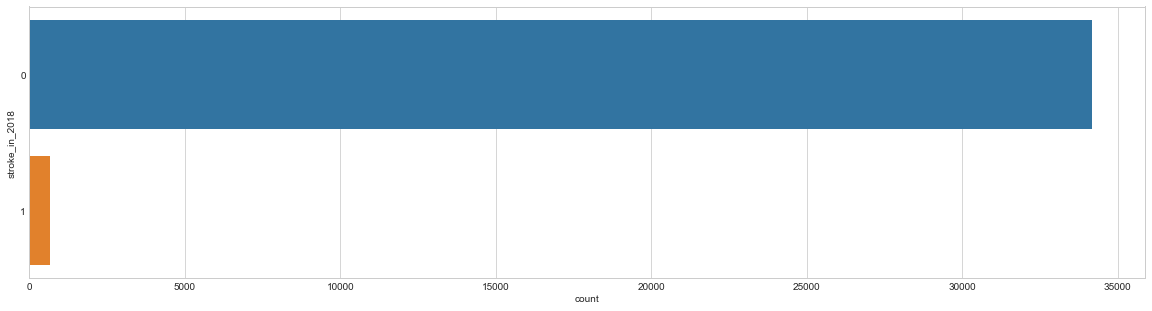

In [114]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='stroke_in_2018', data=new_df_2);
print(new_df_2.stroke_in_2018.value_counts())

In [187]:
def cleanBinary(x, flip=False):
    val = x
    try:
        val = int(x)
        if flip:
            val = 1 if val == 1 else 0
        else:
            val = 0 if val == 0 else 1
    except ValueError:
        val = ''
    return val

def checkTreated(x):
    if str(x['TreatmentA']) == 'nan':
        return 0
    return 1 if (x['TreatmentA'] == 1 or x['TreatmentB'] == 1 or x['TreatmentC'] == 1 or x['TreatmentD_2'] == 1) else 0

new_df_2['high_BP_2'] = new_df_2['high_BP'].apply(cleanBinary)
new_df_2['heart_condition_detected_2017_2'] = new_df_2['heart_condition_detected_2017'].apply(cleanBinary)
new_df_2['married_2'] = new_df_2['married'].apply(cleanBinary)
new_df_2['TreatmentD_2'] = new_df_2['TreatmentD'].apply(cleanBinary)
new_df_2['treated'] = new_df_2.apply(lambda row: checkTreated(row), axis=1)
#new_df_3 = new_df_2[['id', 'sex', 'age', 'sex and age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'job_status and living_area', 'average_blood_sugar', 'average_blood_sugar_2', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2', 'treated', 'stroke_in_2018']]
new_df_3 = new_df_2[['id', 'sex', 'age', 'sex and age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'job_status and living_area', 'average_blood_sugar', 'average_blood_sugar_2', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2', 'treated']]
print(new_df_3['treated'].unique())
print(len(new_df_3))

[0 1]
8718


In [188]:
new_df_3.to_csv('./Data/test_2.csv')

29.75997935306263


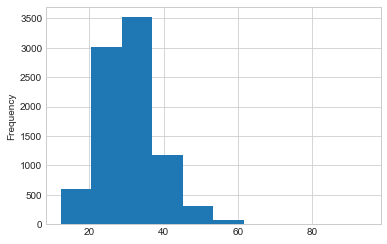

In [189]:
def bmiMean(x, m):
    if x > 0.5:
        return x
    return m

new_df_3 = pd.read_csv('./Data/test_2.csv')
BMI_mean = new_df_3['BMI'].mean()
print(BMI_mean)
new_df_3['BMI_3'] = new_df_3['BMI'].apply(lambda x: bmiMean(x, BMI_mean))
new_df_3.to_csv('./Data/test_2.csv')
new_df_3.BMI_3.plot.hist()

sex: 55
1
54
age: 40
1
39
sex and age: 37
1
36
high_BP_2: 45
1
44
heart_condition_detected_2017_2: 52
2
50
married_2: 16
1
15
job_status and living_area: 22
1
21
average_blood_sugar: 44
1
43
smoker_status: 10618
121
10497
TreatmentA: 33179
504
32675
TreatmentB: 33179
504
32675
TreatmentC: 33179
504
32675
TreatmentD_2: 33180
504
32676

Total: 34831

Total: 34725


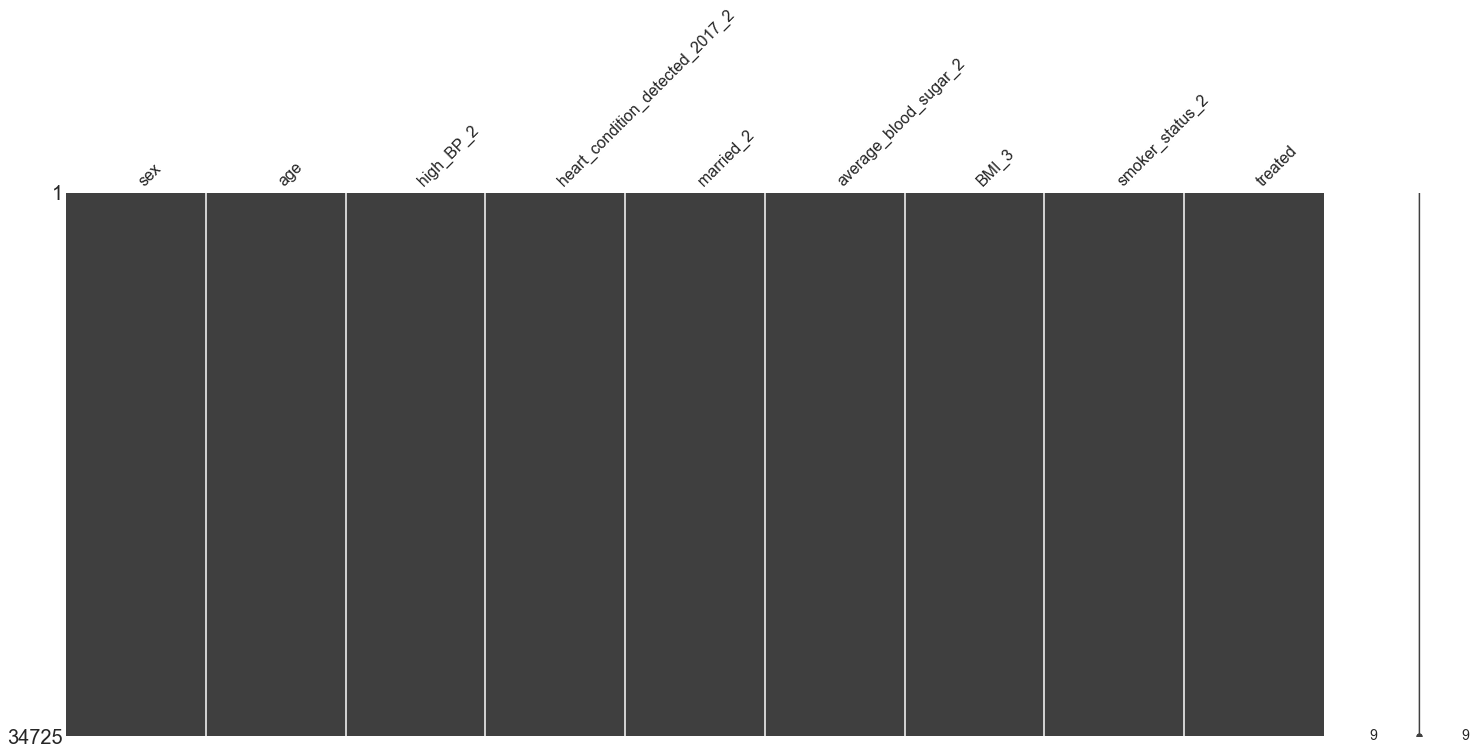

In [131]:
from ModelsTest import runTests

train = pd.read_csv('./Data/train_2.csv')

all_is_null = zip(train.isnull(), train.isnull().sum())
for is_null in all_is_null:
    if is_null[1] > 0:
        print(f'{is_null[0]}: {is_null[1]}')
        train_n = train[train[is_null[0]].isnull()]
        print((train_n['stroke_in_2018'] == 1).sum())
        print((train_n['stroke_in_2018'] == 0).sum())
print()
print(f'Total: {len(train)}')

train_2 = train.dropna(subset=['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2'])

train_2[['id', 'sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2', 'treated', 'stroke_in_2018']].to_csv('./Data/train_clean.csv')

x_train = train_2[['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2', 'treated']].copy()
y_train = train_2[['stroke_in_2018']].copy()

missingno.matrix(x_train)

all_is_null = zip(x_train.isnull(), x_train.isnull().sum())
for is_null in all_is_null:
    if is_null[1] > 0:
        print(f'{is_null[0]}: {is_null[1]}')
print()
print(f'Total: {len(x_train)}')


In [119]:
print(train[train['stroke_in_2018'] == 1]['stroke_in_2018'].count())
print(1 - (train[train['stroke_in_2018'] == 1]['stroke_in_2018'].count() / train['stroke_in_2018'].count()))
print(train_2[train_2['stroke_in_2018'] == 1]['stroke_in_2018'].count())
print(1 - (train_2[train_2['stroke_in_2018'] == 1]['stroke_in_2018'].count() / train_2['stroke_in_2018'].count()))
print('Mean F score for all 0: 0.98480')

652
0.9812810427492751
650
0.9812814974802015
Mean F score for all 0: 0.98480


In [90]:
runTests(x_train, y_train, test_type='cv', data_used=1)

      Model        |       Time       | Accuracy (train) | Accuracy (test) 
----------------------------------------------------------------------------
  Decision Tree    |      2.345       |      99.86       |      96.24      
   Gaussian NB     |      0.317       |      93.14       |      93.11      
  Multinomial NB   |      0.253       |       91.9       |       91.9      
  LogRegression    |      1.162       |      98.13       |      98.13      
Nearest Neighbors  |      2.056       |      98.15       |      98.06      


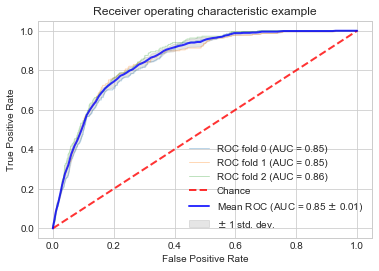

In [122]:
from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)
classifier = LogisticRegressionCV()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(x_train, y_train):
    probas_ = classifier.fit(x_train.iloc[train], y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
